In [1]:
API_Key = "KdtRkUIfVXzOOyTL5bWIJ28gf"
API_Key_Secret = "USJ00an7KpDdJYVDcNhCLHPnVohnVgkeebaGe3Gp8CWHi9ZZnC"
Access_Token = "1442726092133920772-HjJpIWNzHC6PUS9zirhRJPxKhKcRuj"
Access_Token_Secret = "uDvHqkTAeWWBhkyuF8zoJsawdC5JupSSimaWOvMUTjHRm"

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
import streamlit as st
import os

In [3]:
def twan(API_Key, API_Key_Secret, Access_Token, Access_Token_Secret, Twitter_Handler, Tweet_Count):
    warnings.filterwarnings("ignore")
    authenticate = tweepy.OAuthHandler(API_Key,API_Key_Secret)
    authenticate.set_access_token(Access_Token,Access_Token_Secret)
    api = tweepy.API(authenticate,wait_on_rate_limit=True)

    posts = api.user_timeline(screen_name = Twitter_Handler, count=Tweet_Count, tweet_mode="extended")

    df  = pd.DataFrame([t.full_text for t in posts],columns=['Tweets'])

#clean the text
    def clean_txt(text):
        text = re.sub(r"@[A-Za-z0-9]+","",text) # removes @mentions
        text = re.sub(r"#","",text) # removes #
        text = re.sub(r"RT[\s]+","",text) # removes RT re tweet followed by \s-blank spaces
        text = re.sub(r"https?:\/\/\S+","",text) # removes hyperlink 
        return text

    df['Tweets'] = df['Tweets'].apply(clean_txt)    

#subjectivity
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity

#polarity
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity

    df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
    df['Polarity'] = df['Tweets'].apply(getPolarity)

    all_words = " ".join([twts for twts in df['Tweets']])
    word_cloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(all_words)

#no of tweets
    def getAnalysis(score):
        if score < 0:
            return "Negative"
        elif score == 0:
            return "Neutral"
        else:
            return "Positive"

    df['Analysis'] = df['Polarity'].apply(getAnalysis)

    pos_tw = round((df[df.Analysis=='Positive'].shape[0]/df.shape[0])*100)
    neu_tw = round((df[df.Analysis=='Neutral'].shape[0]/df.shape[0])*100)
    neg_tw = round((df[df.Analysis=='Negative'].shape[0]/df.shape[0])*100)
    
    print("Positive Tweets: ",pos_tw)
    print("Neutral Tweets : ",neu_tw)
    print("Negative Tweets: ",neg_tw)

#word cloud
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.title('Word Cloud')
    plt.axis('off')
    plt.savefig('Word Cloud.png')
    plt.show()
    
#sentiment analysis
    sns.countplot(df['Analysis'])
    plt.title('Sentiment Analysis')
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    plt.savefig('Sentiment Analysis.png')
    plt.show()

Positive Tweets:  50
Neutral Tweets :  20
Negative Tweets:  30


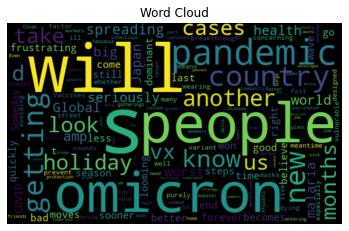

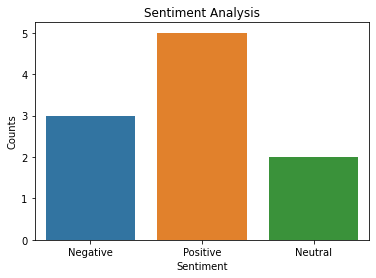

In [4]:
twan(API_Key, API_Key_Secret, Access_Token, Access_Token_Secret,Twitter_Handler="BillGates",Tweet_Count=10)

In [5]:
os.getcwd()

'C:\\Users\\AKSHY\\NLP Projects\\Twitter Analysis'